**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download Eco Driving Score Dataset](https://www.kaggle.com/datasets/sonalshinde123/eco-driving-behavior-dataset)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.



# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

/kaggle/input/eco-driving-behavior-dataset/eco_driving_score.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('eco_driving_score.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,rpm_variation,harsh_braking_count,idling_time,fuel_consumption,acceleration_smoothness,eco_score
0,2147,5,14.2,7.87,0.97,42.1
1,1703,3,4.2,9.37,0.50,36.1
2,2253,0,5.5,8.85,0.78,49.8
3,2866,3,21.7,5.87,0.60,27.7
4,1636,2,3.1,6.71,0.99,79.4


## last Five row

In [4]:
df.tail()

,rpm_variation,harsh_braking_count,idling_time,fuel_consumption,acceleration_smoothness,eco_score
29995,1395,0,6.5,6.50,0.76,74.8
29996,2811,5,6.8,6.84,0.57,38.7
29997,1449,6,15.3,9.93,0.67,33.7
29998,500,3,1.0,6.20,0.73,88.3
29999,1639,2,12.4,7.05,0.51,46.6


## Shape of our dataset

In [5]:
df.shape

(30000, 6)

## List out all columns

In [6]:
df.columns

Index(['rpm_variation', 'harsh_braking_count', 'idling_time',
       'fuel_consumption', 'acceleration_smoothness', 'eco_score'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

rpm_variation                int64
harsh_braking_count          int64
idling_time                float64
fuel_consumption           float64
acceleration_smoothness    float64
eco_score                  float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rpm_variation            30000 non-null  int64  
 1   harsh_braking_count      30000 non-null  int64  
 2   idling_time              30000 non-null  float64
 3   fuel_consumption         30000 non-null  float64
 4   acceleration_smoothness  30000 non-null  float64
 5   eco_score                30000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB


## Check Null Value

In [9]:
df.isnull().sum()

rpm_variation              0
harsh_braking_count        0
idling_time                0
fuel_consumption           0
acceleration_smoothness    0
eco_score                  0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,rpm_variation,harsh_braking_count,idling_time,fuel_consumption,acceleration_smoothness,eco_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1807.951133,2.725667,11.281750,8.052019,0.667652,47.488843
std,679.423972,1.671038,5.294333,1.512837,0.155482,19.462413
min,500.000000,0.000000,0.000000,3.500000,0.030000,0.000000
25%,1325.000000,2.000000,7.600000,7.030000,0.560000,34.600000
50%,1801.000000,3.000000,11.200000,8.040000,0.670000,48.400000
75%,2272.000000,4.000000,14.900000,9.050000,0.780000,61.300000
max,4935.000000,14.000000,32.500000,14.430000,1.000000,100.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

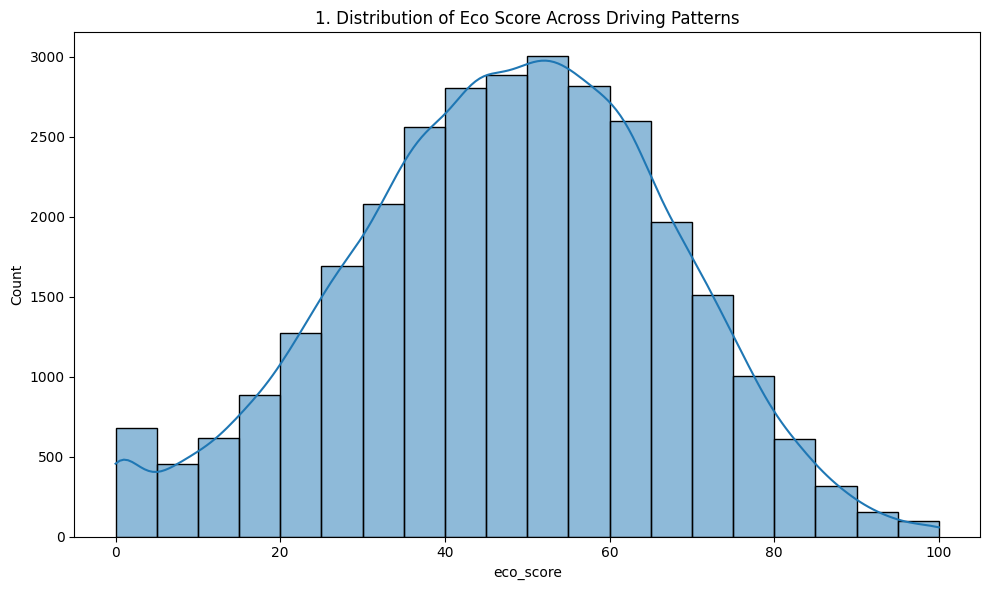

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['eco_score'], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Eco Score Across Driving Patterns')
show_fig()
plot_no += 1


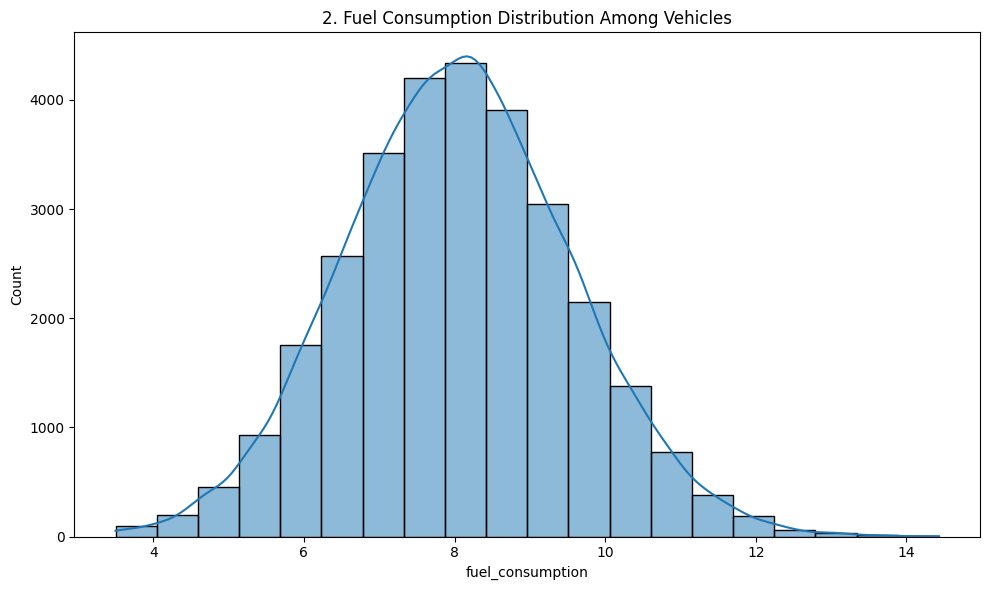

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['fuel_consumption'], bins=20, kde=True)
plt.title(f'{plot_no}. Fuel Consumption Distribution Among Vehicles')
show_fig()
plot_no += 1


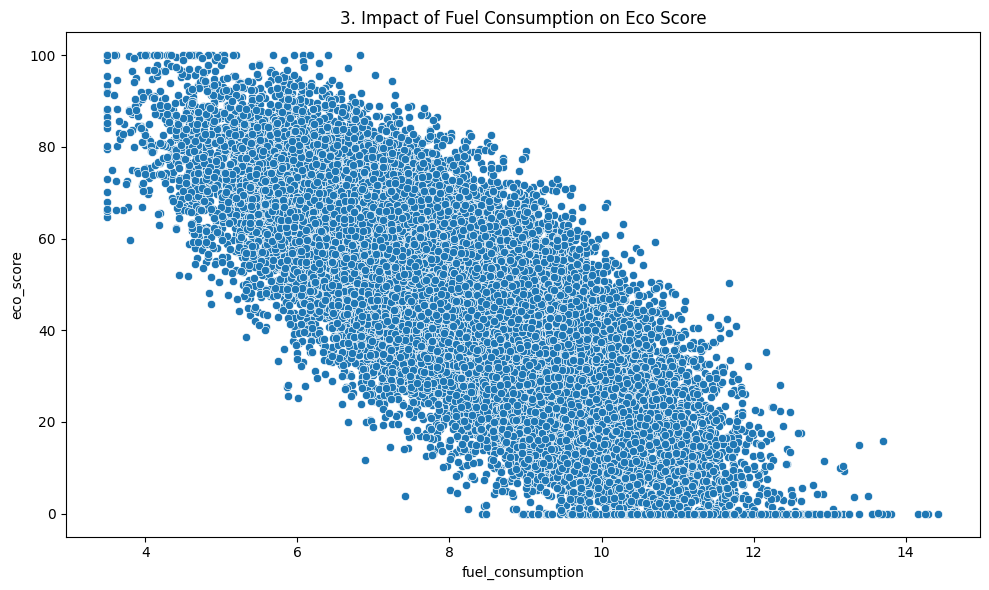

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='fuel_consumption', y='eco_score', data=df)
plt.title(f'{plot_no}. Impact of Fuel Consumption on Eco Score')
show_fig()
plot_no += 1


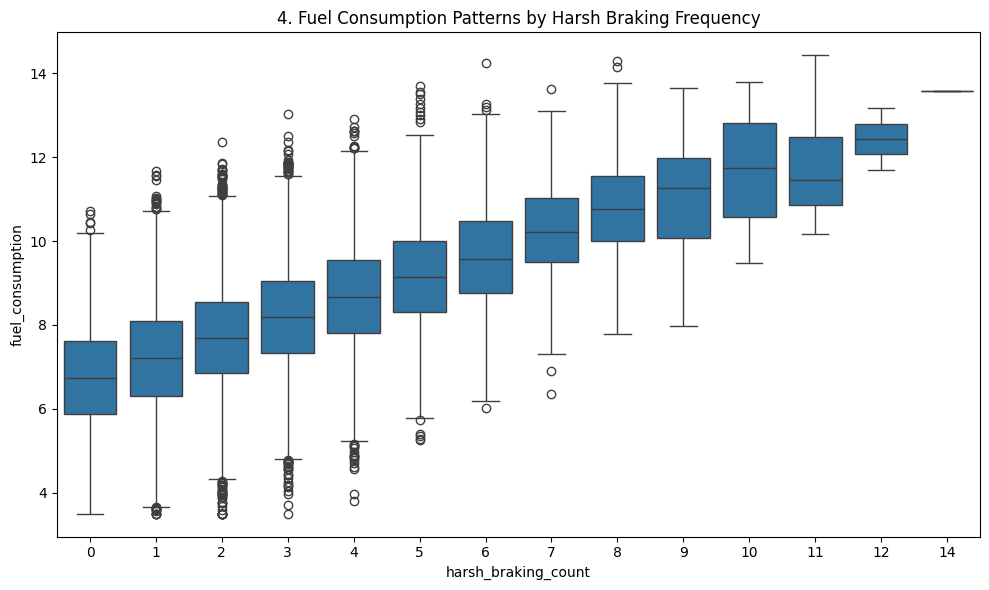

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x=df['harsh_braking_count'], y=df['fuel_consumption'])
plt.title(f'{plot_no}. Fuel Consumption Patterns by Harsh Braking Frequency')
show_fig()
plot_no += 1


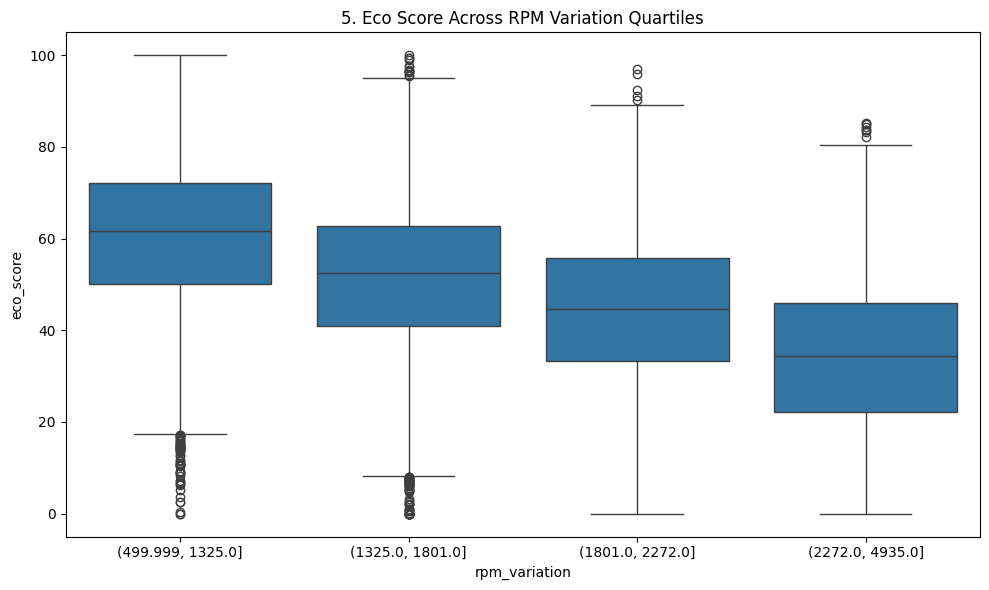

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x=pd.qcut(df['rpm_variation'], 4), y=df['eco_score'])
plt.title(f'{plot_no}. Eco Score Across RPM Variation Quartiles')
show_fig()
plot_no += 1


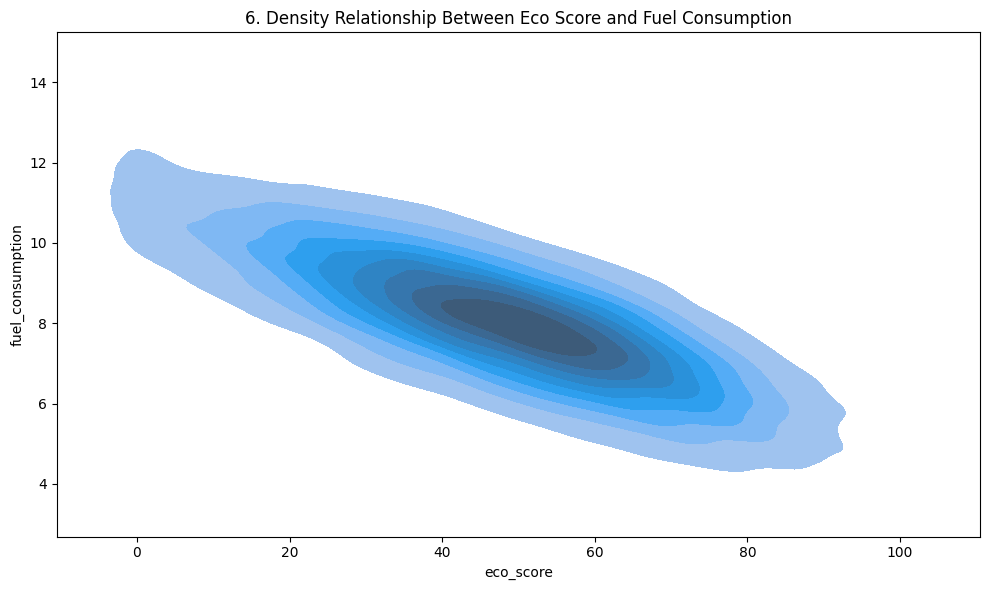

In [18]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x=df['eco_score'], y=df['fuel_consumption'], fill=True)
plt.title(f'{plot_no}. Density Relationship Between Eco Score and Fuel Consumption')
show_fig()
plot_no += 1


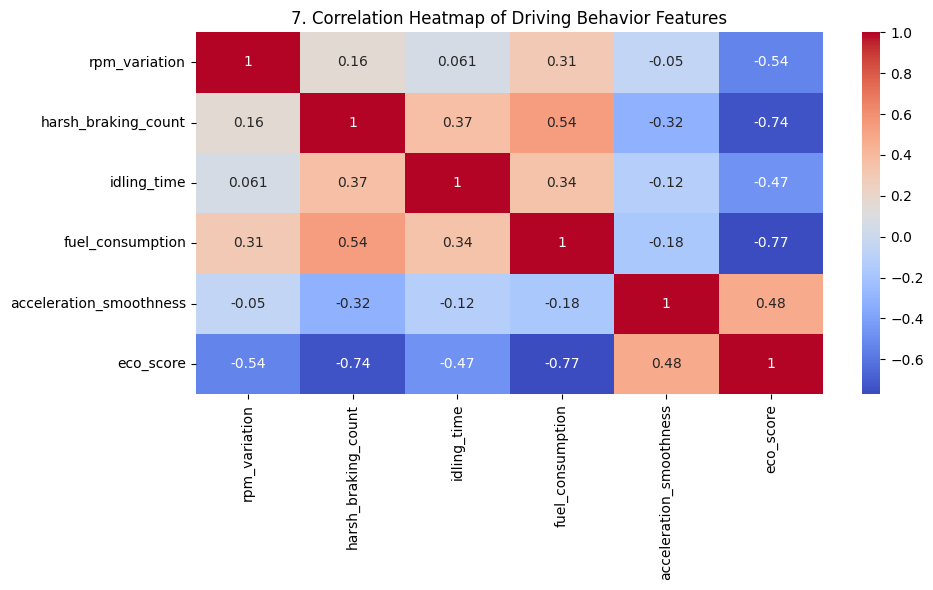

In [19]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Heatmap of Driving Behavior Features')
show_fig()
plot_no += 1

# Model Training

## Define features and target

In [20]:
X = df.drop('eco_score', axis=1)
y = df['eco_score']

## Train-test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train supervised regression model

In [23]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Generate predictions

In [24]:
y_pred = model.predict(X_test_scaled)

## Print model accuracy (R² score)

In [25]:
accuracy = r2_score(y_test, y_pred)
print(f"Model R² Accuracy Score: {accuracy:.4f}")

Model R² Accuracy Score: 0.9317


## Actual vs Predicted visualization

Text(0.5, 0, 'Actual Eco Score')

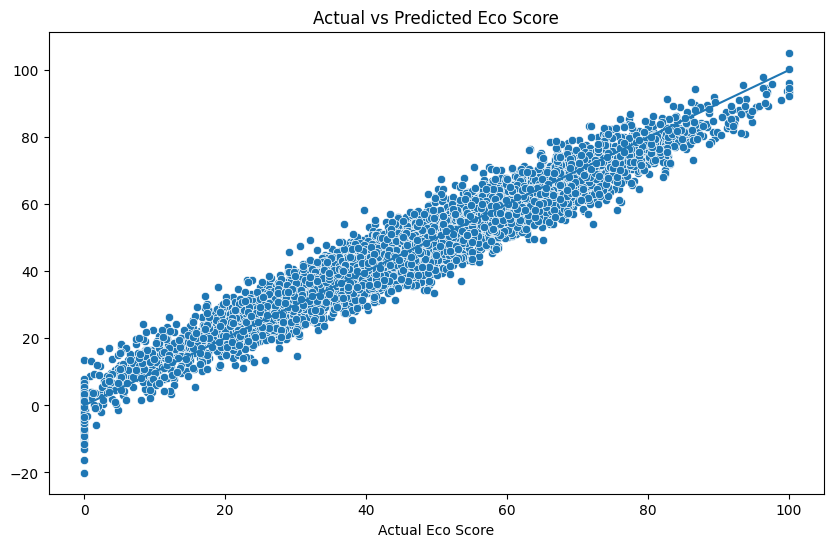

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.title('Actual vs Predicted Eco Score')
plt.xlabel('Actual Eco Score')